#            Project Title : Exploratory Data Analysis of Car Features

The data comes from the Kaggle dataset "Car Features and MSRP". It describes almost 12,000 car models, sold in the USA between 1990 and 2017, with the market price (new or used) and some features. Applying some descriptive statistics and then, you move on to the exploration stage where in you plot various graphs and mine the hidden insights. In this project, we perform Exploratory data analysis on how the different features of a car and its price are related.


---
### 1.0. Import the dataset and the necessary libraries, check datatype, statistical summary, shape, null values etc.

Importing dataset and neccesary libraries which are pandas , numpy , seaborn and matplotlib libraries . We can complete 80 % of the project with these libraries.

In [115]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Loading the dataset
dataset = pd.read_csv('data.csv')
dataset.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350


Checking datatype , statistical summary , shape and null values using info( ) , describe( ) and shape .

In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [117]:
dataset.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.351794,-0.041479,0.263787,0.258240,0.198171,0.073049,0.227590
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008
Engine Cylinders,-0.041479,0.779988,1.000000,-0.140088,-0.621606,-0.600776,0.041145,0.531312
Number of Doors,0.263787,-0.102713,-0.140088,1.000000,0.118570,0.120881,-0.048272,-0.126635
highway MPG,0.258240,-0.406563,-0.621606,0.118570,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.439371,-0.600776,0.120881,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.037501,0.041145,-0.048272,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.662008,0.531312,-0.126635,-0.160043,-0.157676,-0.048476,1.000000


In [118]:
dataset.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [119]:
dataset.shape

(11914, 16)

---


### 2.0 : Dropping less relevant columns from the project.

I dropped these columns because they have very less standard deviation than other columns from which we can understand that these columns are less relevant to the data.

From the above data , you can see the 'Number of Doors' column , there you can see the min and max values of the column.
 i.e; min=2 and max=4 , which means in these column there is only two values and they are 2 and 4 . These values doesn't make any relevance and changes to the target variable.

'Market Category' column doesn't have any importance in the car industry because we cannot say this car only for these people and another reason I dropped this column because , there is many null values than any other column in the given data.





In [120]:
df=dataset.drop(['Number of Doors','Market Category'],axis=1)
df.shape

(11914, 14)

In [121]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


---


### 3.0 : Rename the columns


*   "Engine HP" to "HP"
*   "Engine Cylinders" to "Cylinders"
*   "Transmission Type" to "Transmission"
*   "Engine Cylinders" to "Cylinders"
*   "Driven_Wheels" to "Drive Mode"
*   "highway MPG" to "MPG-H"
*   "city mpg" to "MPG-C"
*   "MSRP" to "Price"

In [122]:
df_new = df.rename(columns={'Engine HP': 'HP',"Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df_new.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


---
### 4.0 : Check for any duplicates in the data, check for null values and missing data and remove them.

From the below code , you can see that we're checking for duplicate rows in the data and we can drop those duplicate data with drop_duplicates().

In [123]:
duplicate_rows_df=df_new[df_new.duplicated()]
print("No.of duplicate rows" ,duplicate_rows_df.shape)

No.of duplicate rows (721, 14)


In [124]:
df_new=df_new.drop_duplicates()
df_new.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [125]:
df_new.shape

(11193, 14)

Here we're going to check for missing data or null values in the data and here we can see there are 69 HP missing values and 3 Engine Fuel Type missing values in the given data. 

In [126]:
print(df_new.isnull().sum())

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64


Now , we going to drop the null values using dropna() .

In [127]:
df_new=df_new.dropna()
df_new.count()

Make                11092
Model               11092
Year                11092
Engine Fuel Type    11092
HP                  11092
Cylinders           11092
Transmission        11092
Drive Mode          11092
Vehicle Size        11092
Vehicle Style       11092
MPG-H               11092
MPG-C               11092
Popularity          11092
Price               11092
dtype: int64

Here we going to find the total count of null values in each column to ensure there is no more missing data.

In [128]:
print(df_new.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


---
### 5.0 : Plot graphs of various columns to check for outliers and remove those data points from the dataset.

We're using Boxplots because it's used to measure of how well distributed the data in a data set is. It divides the data set into three quartiles. Here we are going to find outliers in the data.

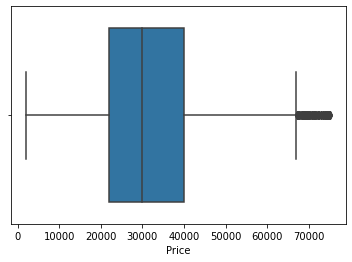

In [163]:
sns.boxplot(x=df_new['Price'])

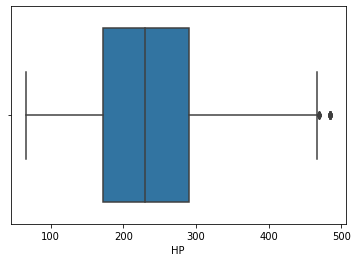

In [164]:
sns.boxplot(x=df_new['HP'])

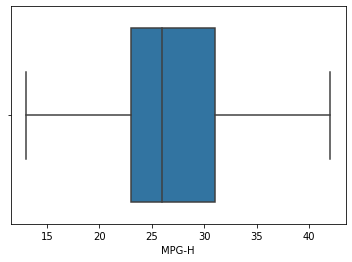

In [165]:
sns.boxplot(x=df_new['MPG-H'])

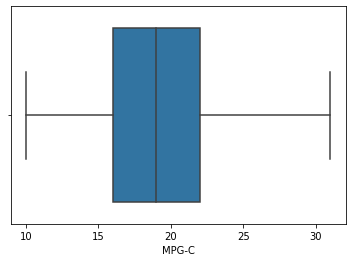

In [166]:
sns.boxplot(x=df_new['MPG-C'])

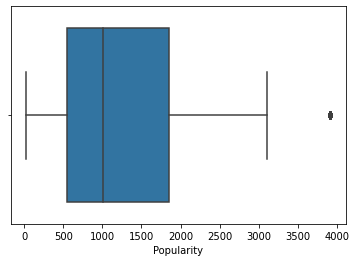

In [167]:
sns.boxplot(x=df_new['Popularity'])

Now we're going to calculate the IQR values of each column above mentioned and going to print them.

In [168]:
Q1=df_new.quantile(0.25)
Q2=df_new.quantile(0.50)
Q3=df_new.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year              8.0
HP              118.0
Cylinders         2.0
MPG-H             8.0
MPG-C             6.0
Popularity     1302.0
Price         18052.5
dtype: float64


Here it comes the exciting thing ! ! !

By using IQR and quartile values we are going to remove outliers from the data.

Here we are with clean data with no null values, duplicate values and outliers in the data. 



In [169]:
df_new=df_new[~((df_new<(Q1-1.5*IQR))|(df_new>(Q3+1.5*IQR))).any(axis=1)]
df_new.shape

(8017, 15)

---


### 6.0 : What car brands are the most represented in the dataset and find the average price among the top car brands.

Here we going  to use matplotlib library to plot top 10 car brands according to there sales in the given project.

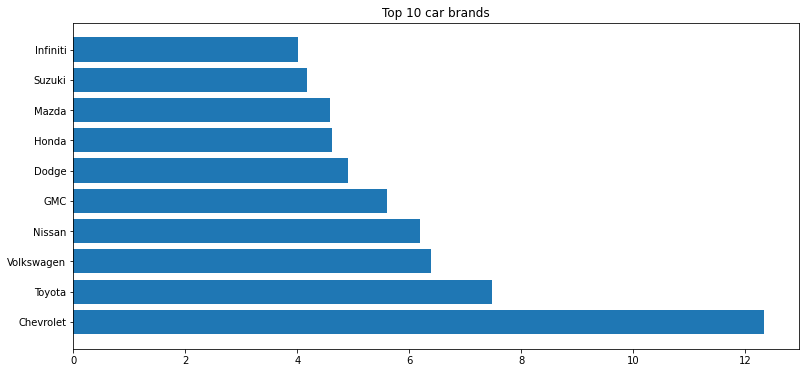

In [170]:
# Percentage of car per brand
counts=df_new['Make'].value_counts()*100/sum(df_new['Make'].value_counts())

#Top 10 car brands
popular_labels=counts.index[:10]

#Plot
plt.figure(figsize=(13,6))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 car brands')
plt.show()

Now , we are going to create a table with Model ('Make') and average price .
We can see there are only 9 models in the data and their mean or average price .

In [137]:
prices=df_new[['Make','Price']].loc[(df_new['Make']=='infiniti')|
                                (df_new['Make']=='Suzuki')|
                                (df_new['Make']=='Honda')|
                                (df_new['Make']=='Mazda')|
                                (df_new['Make']=='Dodge')|
                                (df_new['Make']=='GMC')|
                                (df_new['Make']=='Nissan')|
                                (df_new['Make']=='Volkswagen')|
                                (df_new['Make']=='Toyota')|
                                (df_new['Make']=='Chevrolet')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28188.626459
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Suzuki      18164.098214
Toyota      29011.750397
Volkswagen  29032.817476


---
### 7.0 : Plot the correlation matrix and document your insights.


From the correlation matrix we can see there is **high correlation** between **HP and Cylinders** because more the Cylinders , the more Horsepower.

There is **high negative correlation** between **Highway MPG**, City MPG and **Horsepower (HP)** because the more HP , less the Mileage. 

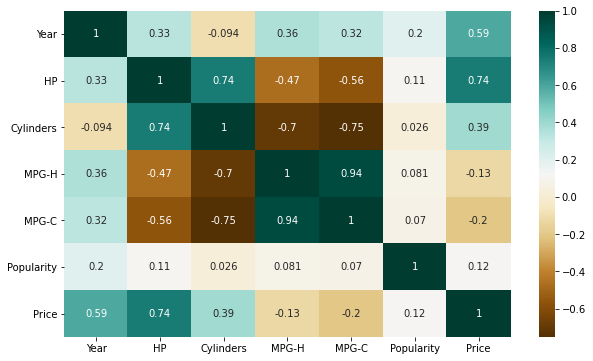

In [138]:
plt.figure(figsize=(10,6))
corr=df_new.corr()
sns.heatmap(corr , cmap="BrBG",annot=True)

---
### 8.0 : Perform EDA and plot different graphs and document your findings

Here we use scatterplots to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Now , we create scatterplot between "HP" and "Price" which represent the relation between Horsepower and price. 

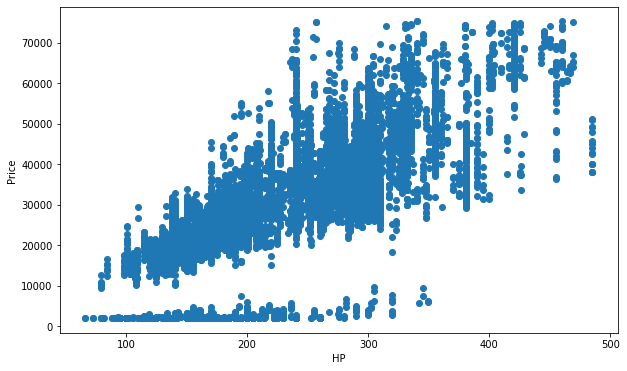

In [139]:
# Scatterplot
fig,ax=plt.subplots(figsize=(10,6))
ax.scatter(df_new['HP'],df_new['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

Here , we're creating bar graph for car 'body' variable from which you can see below.
The bar graph represent the no.of vehicles sold with respect to "Vehicle Style".

Text(0, 0.5, 'No.of vehicles')

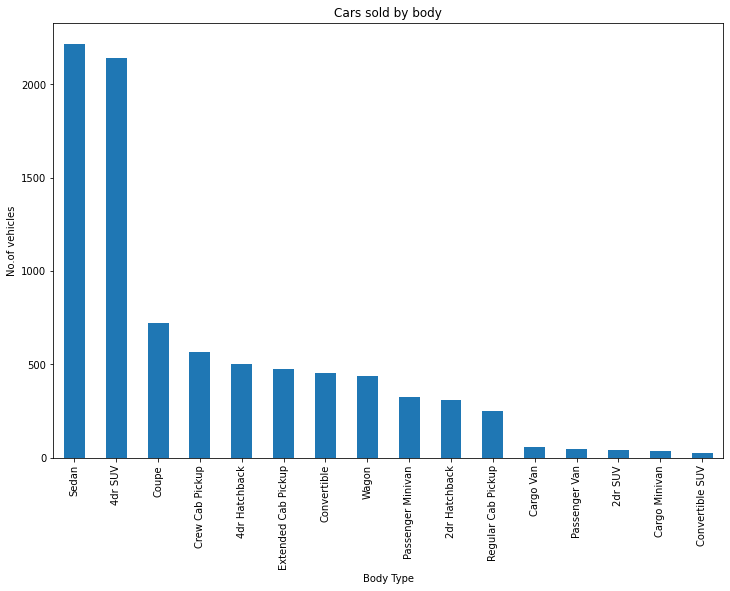

In [140]:
# Bar chart for car 'body' variable
df_new['Vehicle Style'].value_counts().plot.bar(figsize=(12,8))
plt.title("Cars sold by body")
plt.xlabel("Body Type")
plt.ylabel("No.of vehicles")

A countplot is kind of likea histogram or a bar graph for some categorical area. It simply shows the number of occurrences of an item based on a certain type of category.

At y-axis , we use "Vehicle style" column and on x-axis , there is going to be the count of vehicles that are sold with respectively. 
The hue is going to be drive mode of the selected "Vehicle style".

Text(0, 0.5, 'Vehicle Type')

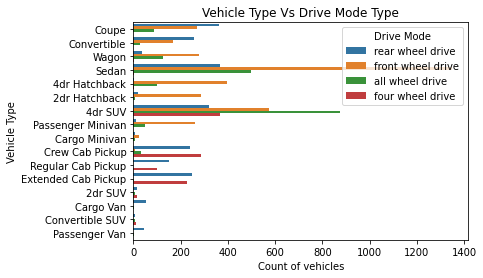

In [141]:
# Vehicle Style type and Drive type analysis
sns.countplot(y='Vehicle Style',data=df_new,hue='Drive Mode')
plt.title("Vehicle Type Vs Drive Mode Type")
plt.xlabel("Count of vehicles")
plt.ylabel("Vehicle Type")

Now we create a new column 'Price_group' and assign the value based on car price and then creating bar plot to represent the 'price_group' column with labels '<20K',  '20K - 39K'  ,'40K - 59K'  ,'60K - 79K'  ,'80K - 99K'  ,'>100K'

In [142]:
# Create a new column 'Price_group' and assign the value based on car price
df_new['price_group']=pd.cut(df_new['Price'],[0,20000,40000,60000,80000,100000,600000],
                         labels=['<20K','20K - 39K','40K - 59K','60K - 79K','80K - 99K','>100K'],include_lowest=True)
df_new['price_group']=df_new['price_group'].astype(object)

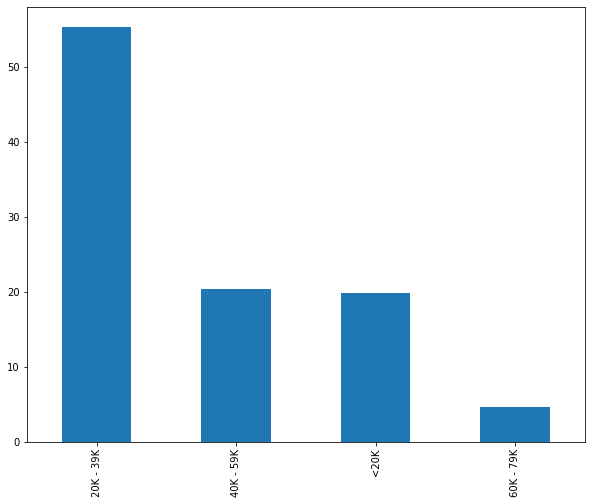

In [143]:
(df_new['price_group'].value_counts()/len(df_new)*100).plot.bar(figsize=(10,8))

---


### 9.0 : build a machine learning model with Price as the target variable.




Splitting the dataset into 80 and 20 ratio , scaling the data and Fitting Multiple Linear Regression to the training set.

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. 



In [144]:
x=df_new[['Year','HP','Cylinders','MPG-H','MPG-C','Popularity']].values
y=df_new['Price'].values

In [145]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(x)
Y=ss.fit_transform(y.reshape(-1,1))

Splitting the dataset into 80 and 20 ratio for training and test data.

In [146]:
# Splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [147]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

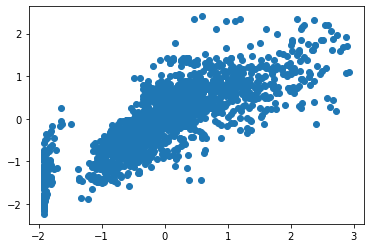

In [148]:
# Predicting the test set results
y_pred=reg.predict(X_test)
plt.scatter(Y_test,y_pred)

Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.

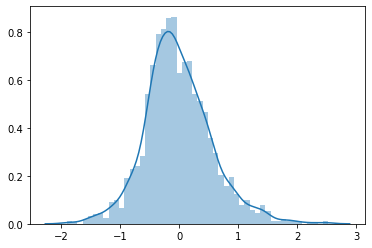

In [149]:
sns.distplot((Y_test-y_pred),bins=50)

checking the performance of the Linear Regression model over metrics like R square, Root Mean Squared Error, Mean Absolute Error etc.

In [150]:
from sklearn import metrics
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,y_pred))
print("R2 Score : ",metrics.r2_score(Y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute Error :  0.4369272357167589
R2 Score :  0.6551590204243145
Root Mean Squared Error :  0.5721827741248073


---


### 10.0 : Try different algorithms and check their performance over metrics like R square, RMSE, MAE etc

Fitting Polynomial Regression to the training set.

 Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial.




In [151]:
from sklearn.preprocessing import PolynomialFeatures
p_reg=PolynomialFeatures(degree=4)
X_poly=p_reg.fit_transform(X_train)
p_reg.fit(X_poly,Y_train)
lin_reg=LinearRegression()
lin_reg.fit(X_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

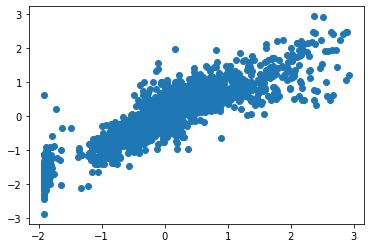

In [152]:
# Predicting result with Polynomial Regression
y_pred=lin_reg.predict(p_reg.fit_transform(X_test))
plt.scatter(Y_test,y_pred)

Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.

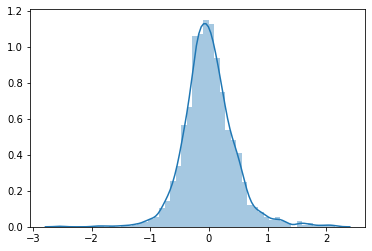

In [153]:
sns.distplot((Y_test-y_pred),bins=50)

checking the performance of the Polynomial Regression model over metrics like R square, Root Mean Squared Error, Mean Absolute Error etc

In [154]:
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,y_pred))
print("R2 Score : ",metrics.r2_score(Y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute Error :  0.31801203084379503
R2 Score :  0.7983863662556726
Root Mean Squared Error :  0.4375072886040844


---


Fitting Support Vector Machine - Regression (SVR) to the training set.

Support Vector Machine - Regression (SVR) Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). 

In [155]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
SVR_reg=SVR(kernel='rbf')
SVR_reg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

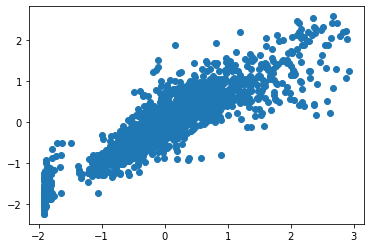

In [156]:
y_pred=SVR_reg.predict(X_test)
plt.scatter(Y_test,y_pred)

Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.

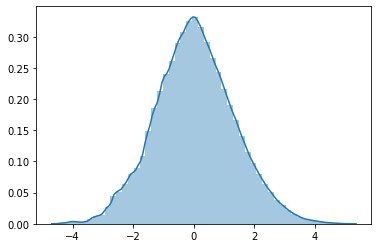

In [157]:
sns.distplot((Y_test-y_pred),bins=50)

checking the performance of the SVR model over metrics like R square, Root Mean Squared Error, Mean Absolute Error etc

In [158]:
print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,y_pred))
print("R2 Score : ",metrics.r2_score(Y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute Error :  0.2990436407411567
R2 Score :  0.8096775098818738
Root Mean Squared Error :  0.4250797334301186


---


Fitting Random Forest Regression to the training set.

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes

In [159]:
# Fitting  Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
RF_reg=RandomForestRegressor(n_estimators=300,random_state=0)
RF_reg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

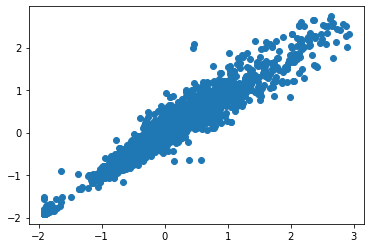

In [160]:
y_pred=RF_reg.predict(X_test)
plt.scatter(Y_test,y_pred)

Seaborn distplot lets you show a histogram with a line on it. This can be shown in all kinds of variations.

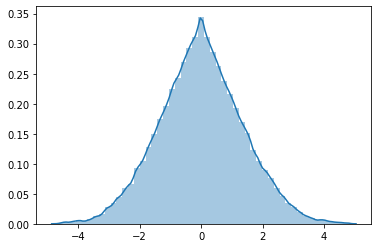

In [161]:
sns.distplot((Y_test-y_pred),bins=50)

checking the performance of the Random Forest Regression model over metrics like R square, Root Mean Squared Error, Mean Absolute Error etc

In [162]:

print("Mean Absolute Error : ",metrics.mean_absolute_error(Y_test,y_pred))
print("R2 Score : ",metrics.r2_score(Y_test,y_pred))
print("Root Mean Squared Error : ",np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean Absolute Error :  0.18016240350940912
R2 Score :  0.9321284741051651
Root Mean Squared Error :  0.25384531388691844


---
### Summary

From all the other ML models , Random Forest Model is the best model for this dataset . 

Because , the R2 score of Random forest is **R2=0.9321** which is way more than other models like .
A Random Forest's nonlinear nature can give it a leg up over linear algorithms, making it a great option.